#### Eksplorasi Klasifikasi pada dataset Fashion MNIST dengan CNN
Imam Ekowicaksono - 33220306

In [1]:
#Import Tensorflow, matplotlib and numpy
import tensorflow as tf 

import matplotlib.pyplot as plt
import numpy as np

Import data Fashion MNIST

In [2]:
#Import Fashion MNIST Dataset and split it into train and test sets
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()
train_images = (np.expand_dims(train_images, axis=-1)/255.).astype(np.float32)
train_labels = (train_labels).astype(np.int64)
test_images = (np.expand_dims(test_images, axis=-1)/255.).astype(np.float32)
test_labels = (test_labels).astype(np.int64)

Menampilkan data training

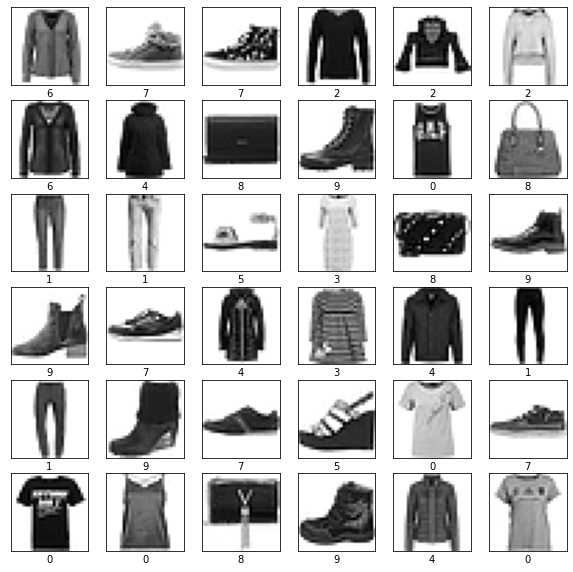

In [3]:
plt.figure(figsize=(10,10))
random_inds = np.random.choice(60000,36)
for i in range(36):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    image_ind = random_inds[i]
    plt.imshow(np.squeeze(train_images[image_ind]), cmap=plt.cm.binary)
    plt.xlabel(train_labels[image_ind])

Merancang model CNN untuk klasifikasi Fashion MNIST

In [4]:
def build_cnn_model():
    cnn_model = tf.keras.Sequential([

        # TODO: Define the first convolutional layer
        tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation=tf.nn.relu),
        tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation=tf.nn.relu),
        #tf.keras.layers.Conv2D(filters=24, kernel_size=(3,3), activation=tf.nn.relu),
        #tf.keras.layers.Conv2D(filters=24, kernel_size=(3,3), activation=tf.nn.relu),
        #tf.keras.layers.Conv2D(filters=24, kernel_size=(3,3), activation=tf.nn.relu),
        # tf.keras.layers.Conv2D('''TODO''') 

        # TODO: Define the first max pooling layer
        #tf.keras.layers.MaxPool2D(pool_size=(2,2)),
        # tf.keras.layers.MaxPool2D('''TODO''')

        # TODO: Define the second convolutional layer
        #tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation=tf.nn.relu),
        # tf.keras.layers.Conv2D('''TODO''')

        # TODO: Define the second max pooling layer
        tf.keras.layers.MaxPool2D(pool_size=(2,2)),
        # tf.keras.layers.MaxPool2D('''TODO''')

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation=tf.nn.relu),
        tf.keras.layers.Dense(128, activation=tf.nn.relu),
        #tf.keras.layers.Dense(128, activation=tf.nn.relu),
        #tf.keras.layers.Dense(128, activation=tf.nn.relu),
        #tf.keras.layers.Dense(128, activation=tf.nn.relu),

        # TODO: Define the last Dense layer to output the classification 
        # probabilities. Pay attention to the activation needed a probability
        # output
        tf.keras.layers.Dense(10, activation=tf.nn.softmax)
        # [TODO Dense layer to output classification probabilities]
    ])
    
    return cnn_model
  
cnn_model = build_cnn_model()
# Initialize the model by passing some data through
cnn_model.predict(train_images[[0]])
# Print the summary of the layers in the model.
print(cnn_model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 128)       36992     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 128)      0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 18432)             0         
                                                                 
 dense (Dense)               (None, 128)               2359424   
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                        

Inisiasi Ukuran Batch, jumlah epoch dan learning rate

In [5]:
'''TODO: Define the batch size and the number of epochs to use during training'''
BATCH_SIZE = 64
EPOCHS = 10
learning_rate = 1e-3

Mengkompilasi model yang sudah dikembangkan

In [6]:
'''TODO: Define the compile operation with your optimizer and learning rate of choice'''
cnn_model.compile(
              optimizer=tf.keras.optimizers.Adamax(learning_rate=learning_rate),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Melakukan training data menggunakan model CNN yang telah dikembangkan dan dataset training yang dibagi menjadi 90% training dan 10% validasi 

In [7]:
from datetime import datetime
start_time = datetime.now()
'''TODO: Use model.fit to train the CNN model, with the same batch_size and number of epochs previously used.'''
history = cnn_model.fit(train_images, train_labels, validation_split = 0.1, batch_size=BATCH_SIZE, epochs=EPOCHS,)
                        # callbacks=[callback], verbose=0)
end_time = datetime.now()
#history.history

Epoch 1/10
844/844 [==============================] - 243s 285ms/step - loss: 0.4519 - accuracy: 0.8398 - val_loss: 0.3199 - val_accuracy: 0.8870
Epoch 2/10
844/844 [==============================] - 234s 277ms/step - loss: 0.2955 - accuracy: 0.8953 - val_loss: 0.2884 - val_accuracy: 0.8938
Epoch 3/10
844/844 [==============================] - 230s 272ms/step - loss: 0.2488 - accuracy: 0.9098 - val_loss: 0.2650 - val_accuracy: 0.9017
Epoch 4/10
844/844 [==============================] - 228s 270ms/step - loss: 0.2129 - accuracy: 0.9221 - val_loss: 0.2312 - val_accuracy: 0.9160
Epoch 5/10
844/844 [==============================] - 231s 273ms/step - loss: 0.1847 - accuracy: 0.9326 - val_loss: 0.2301 - val_accuracy: 0.9152
Epoch 6/10
844/844 [==============================] - 231s 274ms/step - loss: 0.1602 - accuracy: 0.9414 - val_loss: 0.2223 - val_accuracy: 0.9188
Epoch 7/10
844/844 [==============================] - 233s 276ms/step - loss: 0.1373 - accuracy: 0.9508 - val_loss: 0.2131 -

Plotting akurasi train dan validation model CNN yang digunakan 

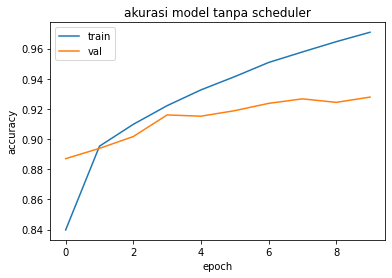

In [8]:
import keras
from matplotlib import pyplot as plt
#history = model1.fit(train_x, train_y,validation_split = 0.1, epochs=50, batch_size=4)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('akurasi model tanpa scheduler')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [9]:
'''TODO: Use the evaluate method to test the model!'''
test_loss, test_acc = cnn_model.evaluate(test_images, test_labels)
# test_loss, test_acc = # TODO

print('Test accuracy:', test_acc)
print('Duration: {}'.format(end_time - start_time))

313/313 [==============================] - 13s 42ms/step - loss: 0.2508 - accuracy: 0.9212
Test accuracy: 0.9211999773979187
Duration: 0:38:31.445060


In [10]:
'''TODO: Define learning rate scheduller'''
initial_learning_rate = 1e-3
epochs = 10
powers = 1
decay = learning_rate/EPOCHS

In [11]:
'''TODO: Defined polinomial decay'''
class lr_polynomial_decay:
	def __init__(self, epochs=epochs, learning_rate=initial_learning_rate, power=powers):
		# store the maximum number of epochs, base learning rate,
		# and power of the polynomial
		self.epochs = epochs
		self.learning_rate = learning_rate
		self.power = power
        
	def __call__(self, epoch):
		# compute the new learning rate based on polynomial decay
		decay = (1 - (epoch / float(self.epochs))) ** self.power
		updated_eta = self.initial_learning_rate * decay
		# return the new learning rate
		return float(updated_eta)

In [12]:
def lr_time_based_decay(epochs, learning_rate):
        return (learning_rate * 1) / (1 + (decay * epochs))

def lr_exp_decay(epoch):
    k = 0.1
    return initial_learning_rate * math.exp(-k*epoch)

In [13]:
#curScheduler = lr_polynomial_decay(epochs=EPOCHS, learning_rate=initial_learning_rate, power=POWER)
#curScheduler = lr_time_based_decay(epochs=epochs, learning_rate=initial_learning_rate)

'''TODO: Define the compile operation with your optimizer and learning rate of choice'''
cnn_model.compile(
              optimizer='adamax',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
#round(cnn_model.optimizer.lr.numpy(), 10)
# cnn_model.compile(optimizer='''TODO''', loss='''TODO''', metrics=['accuracy']) # TODO

In [14]:
from datetime import datetime
start_time = datetime.now()
'''TODO: Use model.fit to train the CNN model, with the same batch_size and number of epochs previously used.'''
#callback = tf.keras.callbacks.LearningRateScheduler(curScheduler)
history_scheduler = cnn_model.fit(train_images, train_labels, validation_split = 0.1, batch_size=BATCH_SIZE, 
                                    epochs=EPOCHS)#, callbacks=[callback], verbose=1)
# cnn_model.fit('''TODO''')
end_time = datetime.now()
#round(cnn_model.optimizer.learning_rate.numpy(), 5)
history_scheduler.history

Epoch 1/10
844/844 [==============================] - 228s 270ms/step - loss: 0.0741 - accuracy: 0.9738 - val_loss: 0.2472 - val_accuracy: 0.9243
Epoch 2/10
844/844 [==============================] - 226s 268ms/step - loss: 0.0564 - accuracy: 0.9805 - val_loss: 0.2677 - val_accuracy: 0.9238
Epoch 3/10
844/844 [==============================] - 223s 264ms/step - loss: 0.0456 - accuracy: 0.9844 - val_loss: 0.2746 - val_accuracy: 0.9228
Epoch 4/10
844/844 [==============================] - 242s 287ms/step - loss: 0.0361 - accuracy: 0.9879 - val_loss: 0.2890 - val_accuracy: 0.9262
Epoch 5/10
844/844 [==============================] - 225s 267ms/step - loss: 0.0288 - accuracy: 0.9908 - val_loss: 0.3169 - val_accuracy: 0.9235
Epoch 6/10
844/844 [==============================] - 225s 267ms/step - loss: 0.0227 - accuracy: 0.9927 - val_loss: 0.3194 - val_accuracy: 0.9235
Epoch 7/10
844/844 [==============================] - 222s 263ms/step - loss: 0.0181 - accuracy: 0.9944 - val_loss: 0.3373 -

{'loss': [0.07407847791910172,
  0.0563717857003212,
  0.045562081038951874,
  0.036145664751529694,
  0.028795819729566574,
  0.022739281877875328,
  0.01809110678732395,
  0.01351136714220047,
  0.01009802334010601,
  0.008421815000474453],
 'accuracy': [0.9737592339515686,
  0.9805185198783875,
  0.9843518733978271,
  0.9878703951835632,
  0.9907592535018921,
  0.99272221326828,
  0.9943703413009644,
  0.996222198009491,
  0.9972037076950073,
  0.9977037310600281],
 'val_loss': [0.24721822142601013,
  0.267729252576828,
  0.2746211886405945,
  0.28897085785865784,
  0.31693410873413086,
  0.3194378912448883,
  0.33733952045440674,
  0.39359214901924133,
  0.3762670159339905,
  0.4273144602775574],
 'val_accuracy': [0.9243333339691162,
  0.9238333106040955,
  0.9228333234786987,
  0.9261666536331177,
  0.9235000014305115,
  0.9235000014305115,
  0.9253333210945129,
  0.9223333597183228,
  0.92166668176651,
  0.9231666922569275]}

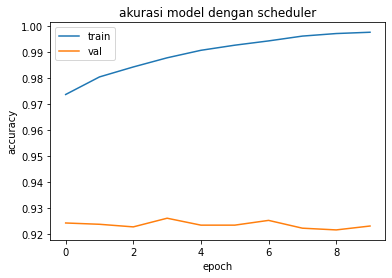

In [15]:
import keras
from matplotlib import pyplot as plt
#history = model1.fit(train_x, train_y,validation_split = 0.1, epochs=50, batch_size=4)
plt.plot(history_scheduler.history['accuracy'])
plt.plot(history_scheduler.history['val_accuracy'])
plt.title('akurasi model dengan scheduler')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [16]:
'''TODO: Use the evaluate method to test the model!'''
test_loss, test_acc = cnn_model.evaluate(test_images, test_labels)
# test_loss, test_acc = # TODO

print('Test accuracy:', test_acc)
print('Duration: {}'.format(end_time - start_time))

313/313 [==============================] - 16s 45ms/step - loss: 0.4620 - accuracy: 0.9194
Test accuracy: 0.9193999767303467
Duration: 0:36:56.461136
